# KNearestNeighbor Classification Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# Using the Iris dataset

### In my data some cleaning/preparation is needed

In [2]:
iris = pd.read_csv('/Users/erinberardi/Erin_dataV2-labs/module-3/Data-Cleaning-Challenge/iris-data.csv')

In [3]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

### combining different names to create 3 types of iris

In [6]:

iris['class'].replace({'Iris-setossa':'Iris-setosa','versicolor':'Iris-versicolor'},inplace=True)

In [7]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Checking for null values

In [8]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [9]:
iris[iris['petal_width_cm'].isna()] 

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


### All null values are within the Iris-setosa class. 

In [10]:
iris[iris['class']=='Iris-setosa'].mean()

sepal_length_cm    5.034000
sepal_width_cm     3.418000
petal_length_cm    1.464000
petal_width_cm     0.251111
dtype: float64

### Replacing Null values with average of same type of Iris.

In [11]:
iris['petal_width_cm'].fillna(0.251111, inplace = True)
iris.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.200000,Iris-setosa
1,4.9,3.0,1.4,0.200000,Iris-setosa
2,4.7,3.2,1.3,0.200000,Iris-setosa
3,4.6,3.1,1.5,0.200000,Iris-setosa
4,5.0,3.6,1.4,0.200000,Iris-setosa
5,5.4,3.9,1.7,0.400000,Iris-setosa
6,4.6,3.4,1.4,0.300000,Iris-setosa
7,5.0,3.4,1.5,0.251111,Iris-setosa
8,4.4,2.9,1.4,0.251111,Iris-setosa
9,4.9,3.1,1.5,0.251111,Iris-setosa


### Looking at plots of the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfb64466a0>,
      dtype=object)

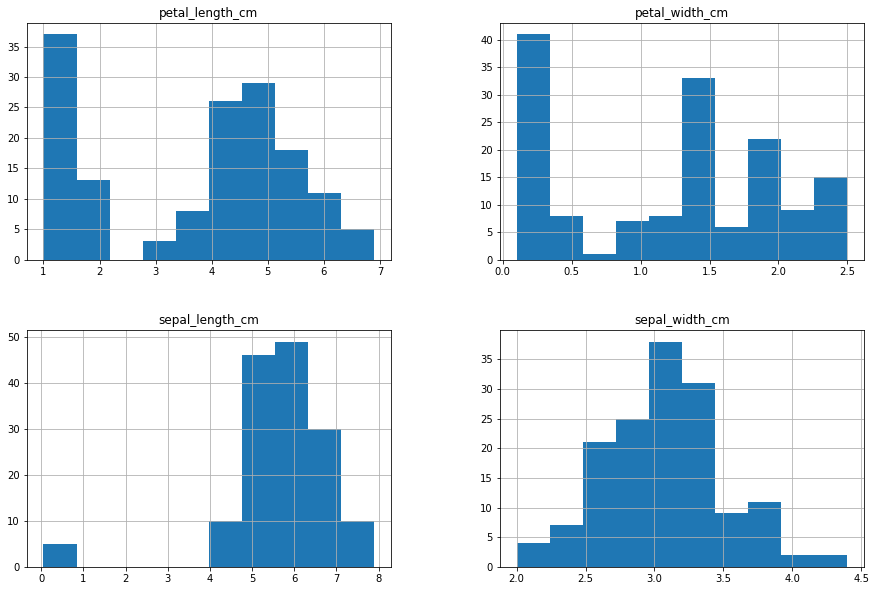

In [12]:
iris.hist(bins=10,figsize = (15,10))

### Sepal length may have outliers

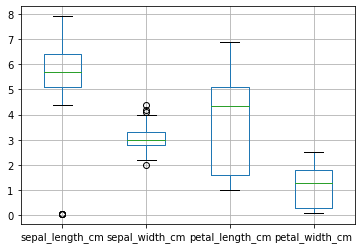

In [13]:
iris.boxplot()

In [14]:
iris['sepal_length_cm'].min()

0.055

In [15]:
iris[iris['sepal_length_cm']<.5] 

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


### There are 5 outliers in sepal_length_cm.  It looks as though the number was entered incorrectly.  I am choosing to change the value to reflect the incorrect decimal placement

In [16]:
iris['sepal_length_cm']= iris['sepal_length_cm'].apply(lambda x: x*100 if x<1 else x)

# Let's look at plots

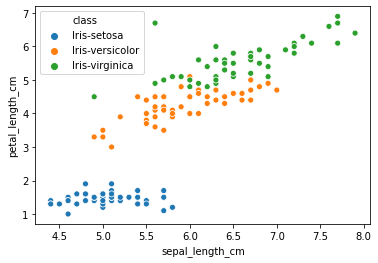

In [17]:
sns.scatterplot(iris['sepal_length_cm'],iris['petal_length_cm'],hue=iris['class'])

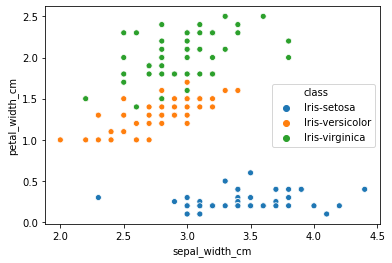

In [18]:
sns.scatterplot(iris['sepal_width_cm'],iris['petal_width_cm'],hue=iris['class'])

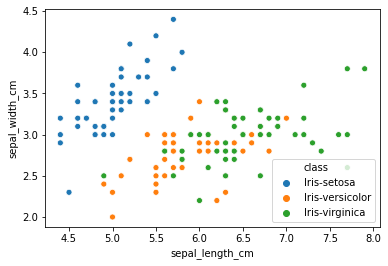

In [19]:
sns.scatterplot(iris['sepal_length_cm'],iris['sepal_width_cm'],hue=iris['class'])

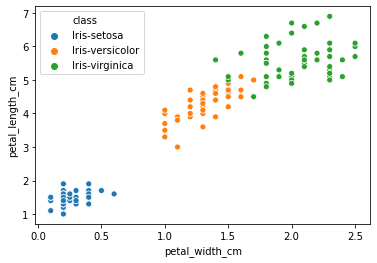

In [20]:
sns.scatterplot(iris['petal_width_cm'],iris['petal_length_cm'],hue=iris['class'])

# Train Test Split

In [21]:
y = iris['class']
X = iris.drop('class', axis = 1)


X_train, X_test, y_train, y_test=tts(X, y, test_size=.2, random_state = 13)

# Scale the numericals

In [22]:
scaler = MinMaxScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_scale = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_train_scale.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,0.571429,0.523810,0.789474,0.708333
1,0.228571,1.000000,0.087719,0.000000
2,0.285714,0.666667,0.087719,0.125000
3,0.714286,0.523810,0.719298,0.916667
4,0.542857,0.238095,0.701754,0.916667


In [23]:
X_test_norm = scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test_norm, columns=X_test.columns)
X_test_scale.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,0.371429,0.380952,0.614035,0.500000
1,0.342857,0.428571,0.456140,0.500000
2,0.200000,0.809524,0.087719,0.125000
3,0.400000,0.333333,0.719298,0.750000
4,0.685714,0.476190,0.789474,0.833333


### Running the classifier with 5 nearest neighbors.  You should usually choose an odd number.

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
KNear = knn.fit(X_train_scale, y_train)


In [31]:
y_pred = KNear.predict(X_test_scale)

In [32]:
print('KNN_train: ', KNear.score(X_train_scale, y_train),'KNN_test: ', KNear.score(X_test_scale, y_test) )

KNN_train:  0.9666666666666667 KNN_test:  0.9666666666666667


In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Calculating error for K values between 1 and 40
### Plotting error rate

In [28]:
error = []


for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scale, y_train)
    pred_i = knn.predict(X_test_scale)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

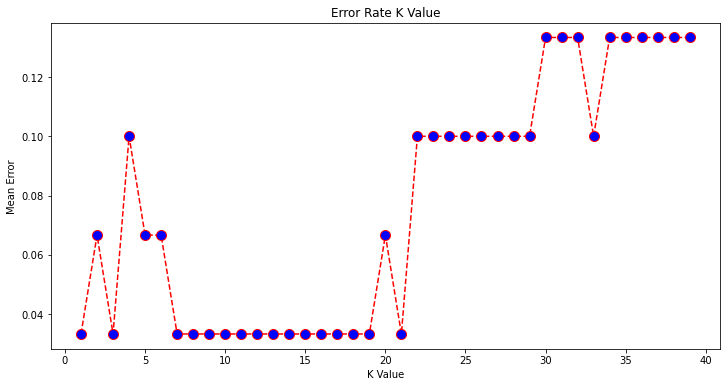

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Error rate for 7 nearest neighbors looks much better.  I will return and try with 7 neighbors.

## Enter new data from unknown iris

In [34]:
testSet = [[1.4, 3.6, 3.4, 1.2]]
test = pd.DataFrame(testSet)
test

,0,1,2,3
0,1.4,3.6,3.4,1.2


### Scale using same scaler

In [35]:
test_scale = scaler.transform(test)
test_scale

array([[-0.85714286,  0.76190476,  0.42105263,  0.45833333]])

## Find predicted Iris class

In [36]:
print("predicted:",KNear.predict(test_scale))

predicted: ['Iris-setosa']
